# Basics of reproducible fMRI analysis with SPM12, Octave, Jupyter and Binder 

This is a [Jupyter notebook](https://jupyter.org/) running an [Octave kernel](https://github.com/Calysto/octave_kernel) on [Binder](https://mybinder.org/), which allows cloud-based computation using SPM12 and Matlab scripts. It is therefore a reproducible environment for fMRI analysis using [SPM12](https://www.fil.ion.ucl.ac.uk/spm/software/download/). Anyone with internet access can run this same code on the same data and should get the same results. It is not only a useful tool for tutorials and sharing work with collaborators, but specifically also as a means to share the data and methods underlying your scientific results.

For a step-by-step description of how to set this up yourself, see this [blog post](https://jsheunis.github.io/2020-04-14-spm12-octave-binder/)

For a more detailed tutorial on single subject, first-level fMRI analysis using the same setup, see [this notebook](https://github.com/jsheunis/spm12-octave-jupyter/blob/master/spm12_scripting_tutorial.ipynb). *P.S. the link points to the notebook in its GitHub repository, but you can also explore it interactively in Binder.*

---

Below follows short code snippets and explanations of how to run basic commands with SPM12 and Octave in a Jupyter notebook.

# Octave and kernel specifics
This notebook currently runs version 4.2.2 of Octave.

In [1]:
disp(['Octave version: ' version])

Octave version: 4.2.2


It has [this Octave kernel for Jupyter](https://github.com/Calysto/octave_kernel) installed, which is based on [MetaKernel](http://calysto.github.io/metakernel/). MetaKernel has a standard set of line/cell magics that can be used in your Jupyter notebook for interacting with code, functions and interpreters at various levels. [Read here](https://github.com/Calysto/metakernel/blob/master/metakernel/magics/README.md) for a full list of magics with explanations, or run `%lsmagic` below to see the available list:


In [2]:
%lsmagic

Available line magics:
%activity  %cd  %connect_info  %conversation  %dot  %download  %edit  %get  %help  %html  %include  %install  %install_magic  %javascript  %jigsaw  %kernel  %kx  %latex  %load  %ls  %lsmagic  %macro  %magic  %matplotlib  %parallel  %plot  %pmap  %px  %python  %reload_magics  %restart  %run  %scheme  %set  %shell

Available cell magics:
%%activity  %%brain  %%conversation  %%debug  %%dot  %%file  %%help  %%html  %%javascript  %%kx  %%latex  %%macro  %%pipe  %%processing  %%px  %%python  %%scheme  %%shell  %%show  %%time  %%tutor


You can view `help` documentation for Octave functions and magic commands as follows (example using `plot` which is both an Octave function and a line magic command):


In [3]:
%help plot

In [4]:
%plot ?

See [this example notebook](https://nbviewer.jupyter.org/github/Calysto/octave_kernel/blob/master/octave_kernel.ipynb) for more use cases of Octave code in a Jupyter notebook. The code snippet below is borrowed from that example. It also shows how to use the `%plot` magic to change the way the figure is displayed.

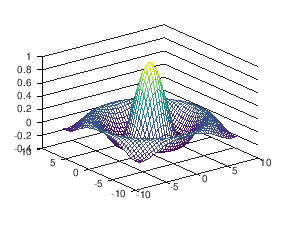

In [17]:
%plot --format png -w 300
tx = ty = linspace (-8, 8, 41)';
[xx, yy] = meshgrid (tx, ty);
r = sqrt (xx .^ 2 + yy .^ 2) + eps;
tz = sin (r) ./ r;
mesh (tx, ty, tz);

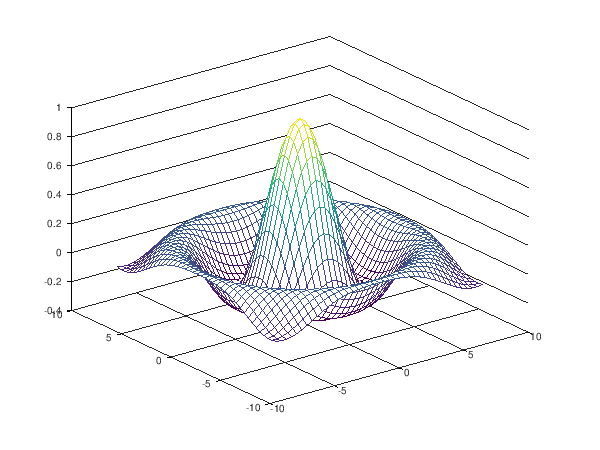

In [18]:
%plot --format png -w 600
mesh (tx, ty, tz);

# fMRI data setup

If you are reading this on Binder, the necessary data and scripts would already have been downloaded to your compute environment hosted in the cloud. This includes the directory named `ds000157-download` which was grabbed from [OpenNeuro](https://openneuro.org/) and contains a single subject's functional and anatomical neuroimages. The root folder also includes Matlab scripts and libraries used below, such as the directories `scripts`, `spm12`, and `dicm2nii`. These are respectively available at:

- https://github.com/jsheunis/matlab-spm-scripts-jsh
- https://github.com/spm/spm12
- https://github.com/xiangruili/dicm2nii

Run the script below in order to extract the required image files, move them to the correct locations, setup the desired directory structure, and initialize required variables.

In [19]:
% Run the data setup script; see data_setup.m in the base directory
data_setup

Data setup finished


# Plotting brain data

Let's load the **anatomical data** (using a derived form of `nii_viewer` from `dicm2nii`) to display the brain in three dimensions (saggital, coronal, axial).

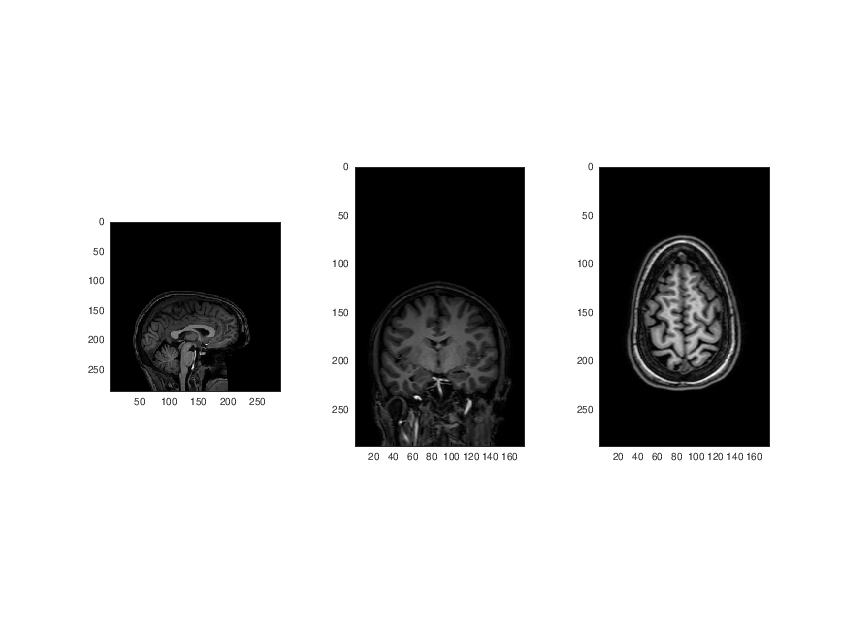

In [20]:
%plot --format png -w 850

[p_anat, frm1, rg1, dim1] = fmrwhy_util_readNifti(anat_fn);
anat_3Dimg = p_anat.nii.img;

[Ni, Nj, Nk] = size(anat_3Dimg);
subplot(131); imagesc(rot90(squeeze(anat_3Dimg(round(Ni/2),:,:)))); colormap gray; axis image
subplot(132); imagesc(rot90(squeeze(anat_3Dimg(:,round(Nj/2),:)))); colormap gray; axis image
subplot(133); imagesc(rot90(squeeze(anat_3Dimg(:,:,round(Nk/2))))); colormap gray; axis image

Let's load the **functional data** (using a derived form of `nii_viewer` from `dicm2nii`) to display the brain in three dimensions (saggital, coronal, axial).

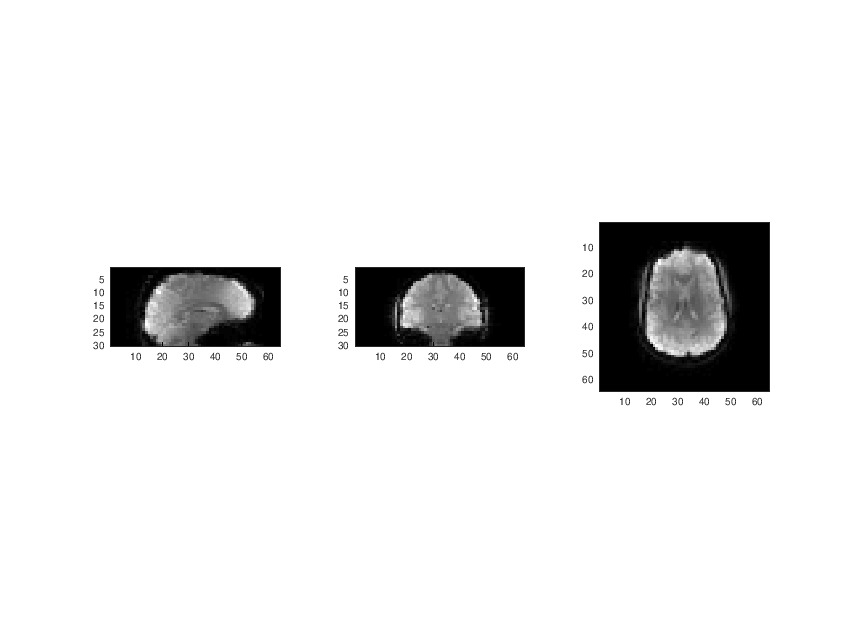

In [21]:
%plot --format png -w 850

[p_func, frm1, rg1, dim1] = fmrwhy_util_readNifti(func_fn);
func_4Dimg = p_func.nii.img;

[Ni, Nj, Nk, Nt] = size(func_4Dimg);
subplot(131); imagesc(rot90(squeeze(func_4Dimg(round(Ni/2),:,:,1)))); colormap gray; axis image
subplot(132); imagesc(rot90(squeeze(func_4Dimg(:,round(Nj/2),:,1)))); colormap gray; axis image
subplot(133); imagesc(rot90(squeeze(func_4Dimg(:,:,round(Nk/2),1)))); colormap gray; axis image

# More to follow

This notebook only shows some basic functionality that's possible when combining the use of SPM12, Matlab scripts, Octave and Jupyter notebooks.

For a more detailed fMRI analysis and scripting run-through, see [this notebook](https://github.com/jsheunis/spm12-octave-jupyter/blob/master/spm12_scripting_tutorial.ipynb).

If you have ideas on how to add to or improve this notebook content (or the repository setup), please feel free to reach out!